In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_ds=pd.read_csv("train.csv")
test_ds=pd.read_csv("test.csv")
train_ds.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5924,NCY54,8.43,Low Fat,0.177695,Household,171.1422,OUT046,1997,Small,Tier 1,Supermarket Type1,2586.6330
2960,NCX18,14.15,Low Fat,0.000000,Household,197.1110,OUT049,1999,Medium,Tier 1,Supermarket Type1,3731.8090
863,FDA51,8.05,Regular,0.164543,Dairy,112.2518,OUT013,1987,High,Tier 3,Supermarket Type1,1707.7770
4109,NCM26,20.50,LF,0.023124,Others,154.6340,OUT013,1987,High,Tier 3,Supermarket Type1,2297.0100
2842,NCO55,NaN,Low Fat,0.090596,Others,106.6938,OUT027,1985,Medium,Tier 3,Supermarket Type3,2251.0698


In [3]:
test_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train_ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test_ds.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
################   Observation #################
# 1.There are nan values in dataset(item_weight and outlet_size)
# 2. Need to convert categorical data to numbrical data
# 3. item_outlet_sales is the taraget feature

In [9]:
train_ds.shape
#8523-rows and 12-columns

(8523, 12)

In [10]:
# Handling missing values by using mean and mode.
train_ds['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
train_ds['Item_Weight'].mean()

12.857645184136183

In [12]:
train_ds['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [13]:
# MEAN value for Item weight is 12.85 and Mode for Outlet_size is Medium

In [14]:
train_ds['Outlet_Size']=train_ds['Outlet_Size'].fillna("Medium")
test_ds['Outlet_Size']=test_ds['Outlet_Size'].fillna("Medium")

train_ds['Item_Weight']=train_ds['Item_Weight'].fillna(train_ds['Item_Weight'].mean())
test_ds['Item_Weight']=test_ds['Item_Weight'].fillna(test_ds['Item_Weight'].mean())

In [15]:
train_ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
test_ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [17]:
train_ds.shape

(8523, 12)

In [18]:
train_ds.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [19]:
#####################################################################################################

In [20]:
train_ds.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
train_ds['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

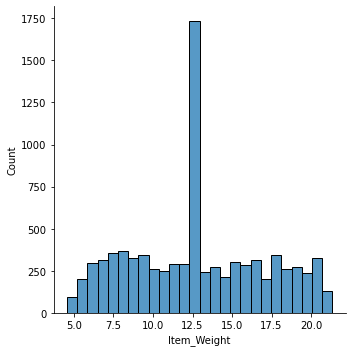

In [22]:
sns.displot(train_ds['Item_Weight'])

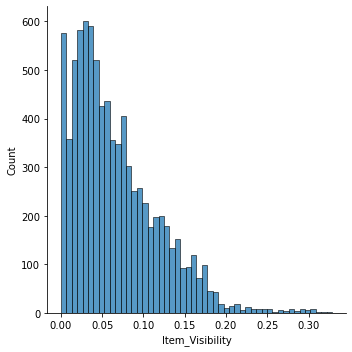

In [23]:
sns.displot(train_ds['Item_Visibility'])

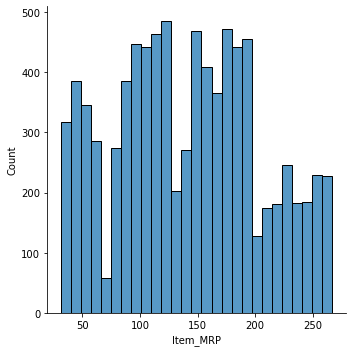

In [24]:
sns.displot(train_ds['Item_MRP'])

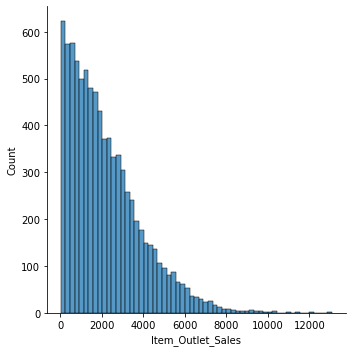

In [25]:
sns.displot(train_ds['Item_Outlet_Sales'])

In [26]:
#now analysing categorical data

In [27]:
train_ds.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

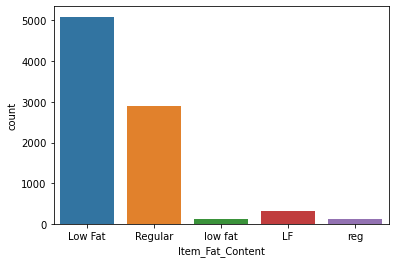

In [28]:
sns.countplot(x="Item_Fat_Content",data=train_ds)

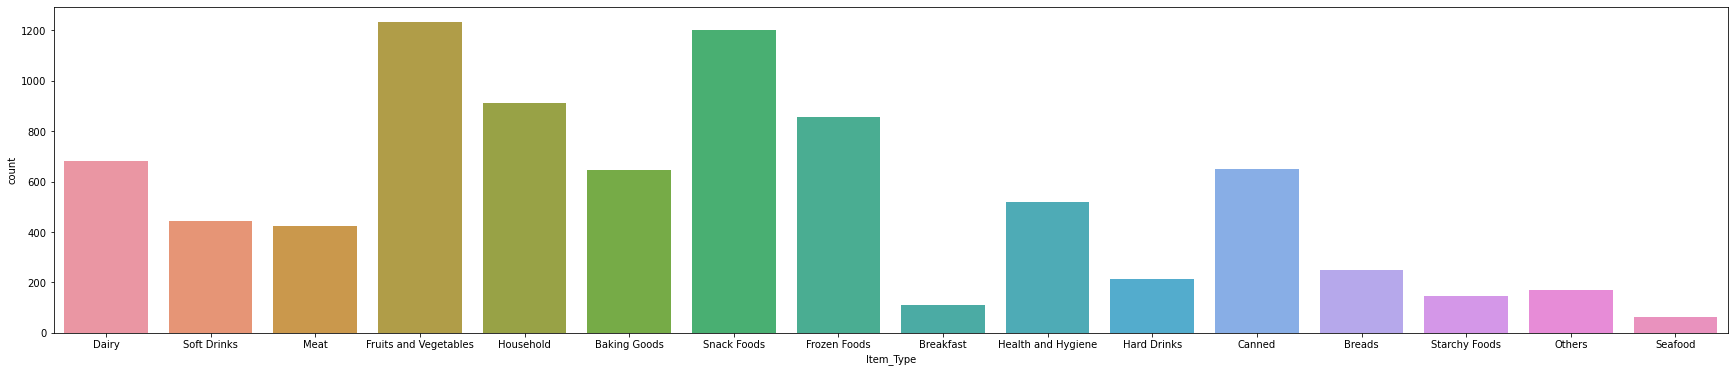

In [29]:
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=train_ds)
plt.show()

In [30]:
train_ds['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
# DATA PRE-PROCESSING
lr=LabelEncoder()
train_ds.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
#ITEM FAT CONTENT
train_ds['Item_Fat_Content'].unique()
train_ds.replace({"Item_Fat_Content": {"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)
train_ds['Item_Fat_Content'].unique()
train_ds['Item_Fat_Content']=lr.fit_transform(train_ds['Item_Fat_Content'])
train_ds['Item_Fat_Content'].unique()

array([0, 1])

In [33]:
train_ds['Item_Type']=lr.fit_transform(train_ds['Item_Type'])
train_ds['Outlet_Size']=lr.fit_transform(train_ds['Outlet_Size'])
train_ds['Outlet_Location_Type']=lr.fit_transform(train_ds['Outlet_Location_Type'])
train_ds['Outlet_Type']=lr.fit_transform(train_ds['Outlet_Type'])

In [34]:
train_ds.sample(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5017,9.895,0,0.168171,14,237.7564,2002,1,1,1,3813.7024
8244,6.825,0,0.059940,8,262.4226,1999,1,0,1,3964.8390
5625,9.060,0,0.009816,11,211.8560,2009,1,2,2,3621.9520
2004,5.405,1,0.053730,3,199.0742,2002,1,1,1,4777.7808
704,7.550,0,0.027212,3,152.7340,1999,1,0,1,2756.4120
4357,9.695,0,0.113918,8,158.2604,2004,2,1,1,2693.8268
3002,17.100,0,0.054514,1,84.4566,2007,1,1,1,591.8962
6018,6.760,1,0.028983,6,79.5960,1997,2,0,1,1438.1280
7092,21.250,0,0.019453,13,120.8756,1999,1,0,1,1454.1072
729,18.700,0,0.089272,13,254.7672,1997,2,0,1,5113.3440


In [35]:
################### TRAIN TEST SPLIT #######################################

In [36]:
X=train_ds.drop(columns='Item_Outlet_Sales',axis=1)
y=train_ds['Item_Outlet_Sales']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


In [39]:
########################## Standardizing Data ##################################33

In [40]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_stand=scaler.fit_transform(X_train)

In [42]:
X_train_stand

array([[ 1.52290029, -0.74155088,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.74155088, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  1.34852514, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.74155088, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  1.34852514,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.74155088,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [43]:
X_test_stand=scaler.transform(X_test)

In [44]:
X_test_stand

array([[-0.43860915, -0.74155088, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.74155088, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  1.34852514,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.74155088,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.74155088, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  1.34852514, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [45]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [55]:
lr_model=LinearRegression()
lr_model.fit(X_train_stand,y_train)

LinearRegression()

In [56]:
y_pred=lr_model.predict(X_test_stand)

In [57]:
y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test,y_pred)

0.5040717488447087

In [62]:
import pickle
filename='bigmart.pkl'
pickle.dump(lr_model,open(filename,'wb'))

In [61]:
pickle.load(open(filename,'rb'))

LinearRegression()